In [64]:
!pip3 install essentia

In [65]:
!pip3 install madmom

In [66]:
!pip3 install mir_eval

The section below is all path dependent

In [67]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = 'drive/MyDrive/Bass/'

import pandas as pd
import sys
sys.path.append(root)

Mounted at /content/drive


In [68]:
import madmom

In [69]:
!ls 'drive/MyDrive/Bass'

 001_beats.csv
 001_beats.gsheet
 002_beats.csv
 abesser_music
 bassunet.py
 data
 data_old
 deviations
 EnergyChecker_AllStems.ipynb
 EnergyChecker_Student_TrinityBillieJean.ipynb
 grades
 HistogramTestBillieJean.ipynb
 HistogramTestBrown.ipynb
 HistogramTestJust.ipynb
 HistogramTestRoad.ipynb
 HistogramTestWOTM.ipynb
 HistogramTestYellow.ipynb
 IEC_billieJean.csv
 __init__.py
 LICENSE
 music
 notebooks_june
 notebooks_may
 pooling.py
 __pycache__
 README.md
 SG_Student_TrinityWOTM.ipynb
 SOP_Student_TrinityBillieJean.ipynb
 statistics
 Statistics_IEC_billieJean.csv
 StudentStatistics_BillieJean.csv
 StudentStatistics_blend_justlooking.csv
 StudentStatisticsInput.csv
 tcl_annotate
 Test_Student_ONSET_TrinityYellow.ipynb
'Thesis Review Meeting.gdoc'
 txt


In [70]:
# TODO 1 optimise imports
from essentia.standard import *
from essentia import Pool, array
import essentia.standard as es
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import pandas as pd
import os

import IPython
import pickle
from pickle import load
from scipy.signal import find_peaks
import ipywidgets as widgets
from scipy import signal
from lxml import etree

import plotly.express as px
import scipy
from statistics import *

In [71]:
import mir_eval
from mir_eval import *

In [72]:
deviatePath = 'drive/MyDrive/Bass/data/wotm/wotm_devs_student0.csv'
col_list = ["onset dev", "offset dev"]
df = pd.read_csv(deviatePath, usecols=col_list)
onset_dev_list = df["onset dev"]
offset_dev_list = df["offset dev"] 

In [73]:
statsPath = 'drive/MyDrive/Bass/data/wotm/StudentStatistics_wotm.csv'
statsCols = ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             "Sound Quality Mark",  " finalMark"]
df_all = pd.read_csv(statsPath, usecols=statsCols)
   

In [74]:
onset_mean_list = df_all["Onset Mean"].tolist()   
print(len(onset_mean_list))
#Student 	precision 	recall 	f_measure_value 	Onset ABS Mean 	Onset Mean 	Onset Std 	Duration ABS Mean 	Duration Mean 	Duration Std 	onsetMark 	DurationMark 	articulationMark 	soundQualityMark 	volumeControlMark 	finalMark

12


In [75]:
print(len(onset_mean_list))
m = mean(onset_mean_list)
print (onset_mean_list)

12
[0.0, -0.003, -0.004, -0.001, -0.001, 0.001, -0.0, -0.008, -0.006, 0.006, 0.006, -0.004]


In [78]:
#
#
#  This allows the generation of multiple histograms by passing the K parameter.
#
#
from math import *
def multiple_hist(deviationsArray1,deviationsArray2,title_text1,title_text2,df,k):
   student_stats1 = [] # onsets
   student_stats2 = [] # durations
   list0 = df["onsetMark"].tolist()  
   list1 = df[" DurationMark"].tolist()  
   list2 = df[" TF 1 Mark "].tolist()  
   list3 = df["Sound Quality Mark"].tolist()  
   list4 = df[" finalMark"].tolist()  
   #k = 0 # Zeroth student is GT
   print("Onset Grade = ", list0[k],"\t" ,"Offset Grade = ", list1[k])
   print("\n")
   print("  TF 1 Mark  = ", list2[k],"Sound Q Grade = ", list3[k])
   print("Final Mark = ", list4[k])
   print("ok1")
   a= deviationsArray1
   m= mean(a)
   print(m)
   s = sqrt(mean(a*a))
   print("ok3")
   am = mean(abs(a))

   onset_summary= "Onset ABS Mean: %f, Onset Mean: %f,Dev. from 0: %f" %(am, m, s)
   title =   "Student "  + str(k) +title_text1
   plt.subplot(2,2,1)
   plt.title(title)
   plt.figure(1, figsize=(9.5, 6))
   plt.hist(a)

   plt.subplot(2,2,2)
   a = deviationsArray2
   m, s = mean(a), sqrt(mean(a*a))
   am = mean(abs(a))
   offset_summary= "Offset ABS Mean: %f, Offset Mean: %f, Dev. from 0: %f" %(am,m, s)
   title =   "Student " + str(k) +title_text2
   plt.title(title)
   plt.figure(1, figsize=(9.5, 6))
   plt.hist(a)
   plt.show()

Onset Grade =  100.0 	 Offset Grade =  100.0


  TF 1 Mark  =  100.0 Sound Q Grade =  100.0
Final Mark =  5.0
ok1
0.0
ok3


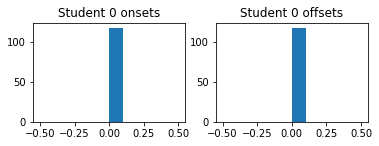

In [79]:
multiple_hist(onset_dev_list,offset_dev_list," onsets"," offsets",df_all,0)

Onset Grade =  100.0 	 Offset Grade =  100.0


  TF 1 Mark  =  100.0 Sound Q Grade =  100.0
Final Mark =  5.0
ok1
0.0
ok3


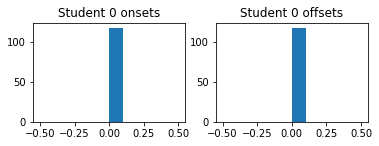

Onset Grade =  79.2 	 Offset Grade =  90.0


  TF 1 Mark  =  79.2 Sound Q Grade =  72.0
Final Mark =  3.6
ok1
-0.0025675675675678484
ok3


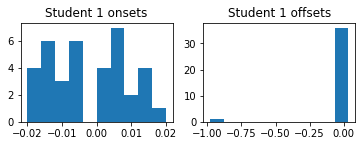

Onset Grade =  56.7 	 Offset Grade =  56.7


  TF 1 Mark  =  72.0 Sound Q Grade =  72.0
Final Mark =  1.8
ok1
-0.0037878787878784107
ok3


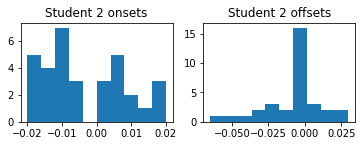

Onset Grade =  72.0 	 Offset Grade =  79.2


  TF 1 Mark  =  79.2 Sound Q Grade =  79.2
Final Mark =  2.7
ok1
-0.0007894736842106028
ok3


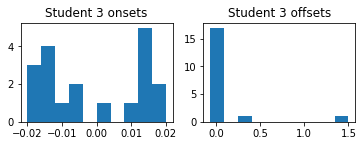

Onset Grade =  72.0 	 Offset Grade =  79.2


  TF 1 Mark  =  79.2 Sound Q Grade =  72.0
Final Mark =  2.7
ok1
-0.001153846153847018
ok3


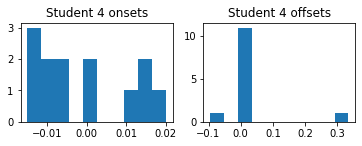

Onset Grade =  79.2 	 Offset Grade =  79.2


  TF 1 Mark  =  79.2 Sound Q Grade =  79.2
Final Mark =  3.6
ok1
0.0011682242990651965
ok3


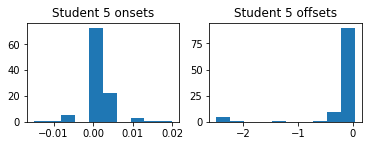

Onset Grade =  72.0 	 Offset Grade =  72.0


  TF 1 Mark  =  72.0 Sound Q Grade =  79.2
Final Mark =  2.7
ok1
-4.33236610543037e-16
ok3


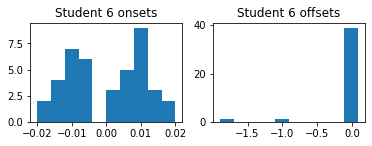

Onset Grade =  56.7 	 Offset Grade =  56.7


  TF 1 Mark  =  72.0 Sound Q Grade =  79.2
Final Mark =  2.7
ok1
-0.007999999999998852
ok3


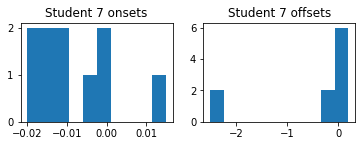

Onset Grade =  72.0 	 Offset Grade =  72.0


  TF 1 Mark  =  72.0 Sound Q Grade =  79.2
Final Mark =  2.7
ok1
-0.006250000000000532
ok3


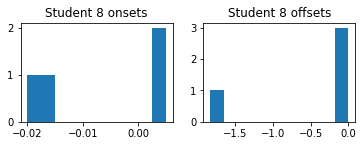

Onset Grade =  79.2 	 Offset Grade =  90.0


  TF 1 Mark  =  90.0 Sound Q Grade =  90.0
Final Mark =  3.6
ok1
0.006250000000001422
ok3


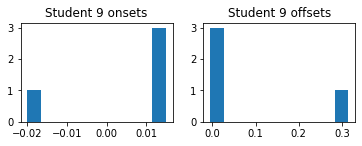

Onset Grade =  72.0 	 Offset Grade =  72.0


  TF 1 Mark  =  56.7 Sound Q Grade =  56.7
Final Mark =  1.8
ok1
0.006250000000001422
ok3


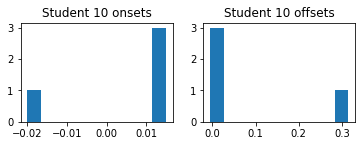

In [80]:
col_list = ["onset dev", "offset dev"]
sonset_deviations = []
soffset_deviations = []
# sonset_deviations,soffset_deviations
k=0
while k<11:
   sdeviatePath = 'drive/MyDrive/Bass/data/wotm/wotm_devs_student' + str(k)+ '.csv'
   sdf = pd.read_csv(sdeviatePath, usecols=col_list)
   sonset_dev_list = sdf["onset dev"]
   sonset_deviations.append(sonset_dev_list)
   soffset_dev_list = sdf["offset dev"] 
   soffset_deviations.append(soffset_dev_list)
   multiple_hist(sonset_dev_list,soffset_dev_list," onsets"," offsets",df_all,k)
   k+=1

In [81]:
df_all

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,Sound Quality Mark,finalMark
0,0,0.992,1.000,0.996,0.000,0.000,0.000,0.000,0.000,0.000,100.0,100.0,100.0,100.0,5.0
1,1,0.306,0.314,0.310,0.010,-0.003,0.012,0.061,-0.047,0.206,79.2,90.0,79.2,72.0,3.6
2,2,0.277,0.280,0.278,0.011,-0.004,0.013,0.021,-0.010,0.027,56.7,56.7,72.0,72.0,1.8
3,3,0.144,0.161,0.152,0.014,-0.001,0.015,0.132,0.097,0.382,72.0,79.2,79.2,79.2,2.7
4,4,0.102,0.110,0.106,0.010,-0.001,0.012,0.215,0.120,0.246,72.0,79.2,79.2,72.0,2.7
5,5,0.648,0.907,0.756,0.002,0.001,0.004,0.530,-0.527,0.997,79.2,79.2,79.2,79.2,3.6
6,6,0.342,0.347,0.345,0.010,-0.000,0.011,0.168,-0.138,0.480,72.0,72.0,72.0,79.2,2.7
7,7,0.069,0.085,0.076,0.011,-0.008,0.013,0.744,-0.687,1.287,56.7,56.7,72.0,79.2,2.7
8,8,0.037,0.034,0.036,0.011,-0.006,0.013,0.942,-0.942,1.295,72.0,72.0,72.0,79.2,2.7
9,9,0.035,0.034,0.034,0.016,0.006,0.016,0.160,0.155,0.223,79.2,90.0,90.0,90.0,3.6


In [ ]:
print(df_all.index)
number_of_rows = len(df_all.index)
print(number_of_rows)
df_all

In [97]:
import csv  
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std= 
# statisticsGenerator(sonset_deviationsArray,sduration_deviationsArray," onsets", " durations",the_student_grades,sp,sr,sf)

def statisticsGenerator(deviationsArray1,deviationsArray2,title_text1,title_text2,df):

   studentStatisticsArray= []
   with open('drive/MyDrive/Bass/data/wotm/StudentStatistics_wotm_out.csv', 'w', encoding='UTF8') as f:
      idx = df.index

      number_of_rows = len(idx)
      print(number_of_rows)
      k=0

      studentStatistics = []
      onset_X = []  # Martis mark
      onset_amean = []
      onset_mean = []
      onset_std= []

      duration_X = [] # Martis mark
      duration_amean = []
      duration_mean = []
      duration_std= []
      list0 = df["onsetMark"].tolist()  
      list1 = df[" DurationMark"].tolist()  
      list2 = df[" TF 1 Mark "].tolist()  
      list3 = df["Sound Quality Mark"].tolist()  
      list4 = df[" finalMark"].tolist()  

      listp = df["precision"].tolist()  
      listr = df["recall"].tolist()  
      listf = df["f_measure_value"].tolist()  
      print("###################### number_of_rows",number_of_rows)
      while k < number_of_rows-1:
          studentStatistics.append(str(k+1))
          student_stats1 = [] # onsets
          student_stats2 = [] # durations

          plt.subplot(2,2,1)
          a = np.array(deviationsArray1[k])
          print(a[0:12])
          onset_m, onset_s = mean(a), sqrt(mean(a*a))
          onset_am= mean(abs(a))
          onset_summary= "Onset ABS  Mean: %f,Onset Mean: %f, Dev. from 0: %f" %(onset_am,onset_m, onset_s)
          title =   "Student " + str(k)+ title_text1

          onset_X.append( list0[k])  # Martis mark
          print("list0[k]")
          print(list0[k])
          onset_mean.append(onset_m)
          onset_amean.append(onset_am)
          onset_std.append(onset_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.subplot(2,2,2)
          a = np.array(deviationsArray2[k])
          duration_m, duration_s = mean(a), sqrt(mean(a*a))
          duration_am= mean(abs(a))
          duration_summary= "Offset Mean: %f, Dev. from 0: %f" %(duration_m, duration_s)
          title =   "Student " + str(k)+ title_text2
          print(title)
          duration_X.append( list1[k])  # Martis mark
          duration_mean.append(duration_m)
          duration_amean.append(duration_am)
          duration_std.append(duration_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.show()
          print("Onset Grade = ", list0[k],"\t" ,"Duration Grade = ", list1[k])
          print("\n")
          print(onset_summary)
          print("\n")
          print(duration_summary)
          print("\n")
          print("  TF 1 Mark  = ", list2[k],"Sound Control Grade = ", list3[k])
          print("Final Mark = ", list4[k])
          studentStatistics = []
          studentStatistics.append(str(k))
          studentStatistics.append(round(listp[k],3))
          studentStatistics.append(round(listr[k],3))
          studentStatistics.append(round(listf[k],3))
          studentStatistics.append(round(onset_am,3))
          studentStatistics.append(round(onset_m,3))
          studentStatistics.append(round(onset_s,3))   
          studentStatistics.append(round(duration_am,3))                   
          studentStatistics.append(round(duration_m,3)) 
          studentStatistics.append(round(duration_s,3))   
          studentStatistics.append(list0[k])
          studentStatistics.append(list1[k])
          studentStatistics.append(list2[k])
          studentStatistics.append(list3[k])
          studentStatistics.append(list4[k])
     
          studentStatisticsArray.append(studentStatistics)
          k+=1
    
   return(onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,studentStatisticsArray,onset_amean, duration_amean)
# Capture a table of onset and grade


12
###################### number_of_rows 12
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
list0[k]
100.0
Student 0 offset


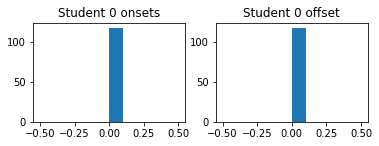

Onset Grade =  100.0 	 Duration Grade =  100.0


Onset ABS  Mean: 0.000000,Onset Mean: 0.000000, Dev. from 0: 0.000000


Offset Mean: 0.000000, Dev. from 0: 0.000000


  TF 1 Mark  =  100.0 Sound Control Grade =  100.0
Final Mark =  5.0
[-0.005  0.005  0.015  0.005  0.     0.005  0.    -0.005  0.005  0.02
 -0.02   0.01 ]
list0[k]
79.2
Student 1 offset


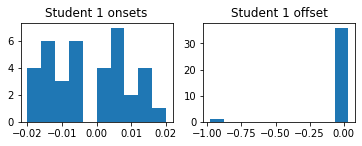

Onset Grade =  79.2 	 Duration Grade =  90.0


Onset ABS  Mean: 0.009865,Onset Mean: -0.002568, Dev. from 0: 0.011712


Offset Mean: -0.029288, Dev. from 0: 0.162239


  TF 1 Mark  =  79.2 Sound Control Grade =  72.0
Final Mark =  3.6
[ 0.005 -0.005  0.     0.02  -0.005  0.02  -0.005 -0.01  -0.02  -0.01
  0.02   0.   ]
list0[k]
56.7
Student 2 offset


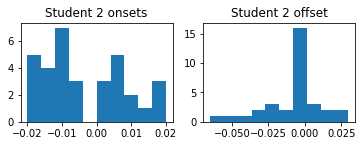

Onset Grade =  56.7 	 Duration Grade =  56.7


Onset ABS  Mean: 0.011061,Onset Mean: -0.003788, Dev. from 0: 0.012822


Offset Mean: -0.006212, Dev. from 0: 0.021195


  TF 1 Mark  =  72.0 Sound Control Grade =  72.0
Final Mark =  1.8
[ 0.015  0.02   0.01   0.015  0.015  0.015 -0.015 -0.02   0.     0.015
 -0.005 -0.02 ]
list0[k]
72.0
Student 3 offset


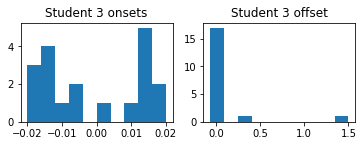

Onset Grade =  72.0 	 Duration Grade =  79.2


Onset ABS  Mean: 0.013947,Onset Mean: -0.000789, Dev. from 0: 0.015000


Offset Mean: 0.081579, Dev. from 0: 0.350214


  TF 1 Mark  =  79.2 Sound Control Grade =  79.2
Final Mark =  2.7
[-0.01   0.01   0.015  0.    -0.015 -0.015 -0.005  0.    -0.015 -0.005
  0.02   0.015]
list0[k]
72.0
Student 4 offset


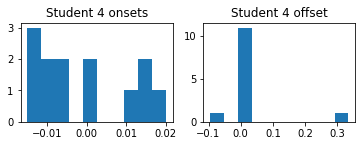

Onset Grade =  72.0 	 Duration Grade =  79.2


Onset ABS  Mean: 0.010385,Onset Mean: -0.001154, Dev. from 0: 0.012010


Offset Mean: 0.018462, Dev. from 0: 0.096576


  TF 1 Mark  =  79.2 Sound Control Grade =  72.0
Final Mark =  2.7
[0.005 0.    0.    0.    0.    0.005 0.005 0.    0.    0.    0.    0.   ]
list0[k]
79.2
Student 5 offset


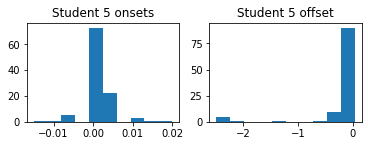

Onset Grade =  79.2 	 Duration Grade =  79.2


Onset ABS  Mean: 0.002103,Onset Mean: 0.001168, Dev. from 0: 0.004242


Offset Mean: -0.187250, Dev. from 0: 0.594240


  TF 1 Mark  =  79.2 Sound Control Grade =  79.2
Final Mark =  3.6
[ 0.01   0.015  0.02  -0.01   0.015  0.005 -0.01   0.01   0.01  -0.005
  0.01   0.01 ]
list0[k]
72.0
Student 6 offset


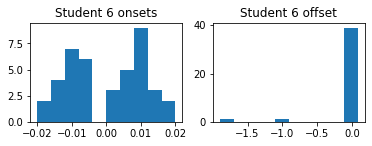

Onset Grade =  72.0 	 Duration Grade =  72.0


Onset ABS  Mean: 0.009756,Onset Mean: -0.000000, Dev. from 0: 0.011098


Offset Mean: -0.067317, Dev. from 0: 0.335017


  TF 1 Mark  =  72.0 Sound Control Grade =  79.2
Final Mark =  2.7
[-0.015  0.    -0.01   0.    -0.005 -0.01  -0.02  -0.02  -0.015  0.015]
list0[k]
56.7
Student 7 offset


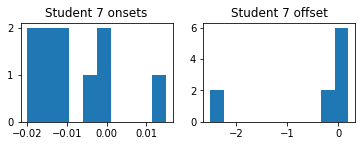

Onset Grade =  56.7 	 Duration Grade =  56.7


Onset ABS  Mean: 0.011000,Onset Mean: -0.008000, Dev. from 0: 0.013038


Offset Mean: -0.481000, Dev. from 0: 1.076843


  TF 1 Mark  =  72.0 Sound Control Grade =  79.2
Final Mark =  2.7
[ 0.005 -0.02   0.005 -0.015]
list0[k]
72.0
Student 8 offset


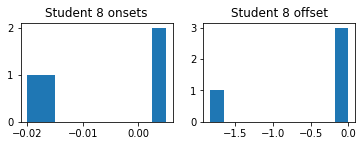

Onset Grade =  72.0 	 Duration Grade =  72.0


Onset ABS  Mean: 0.011250,Onset Mean: -0.006250, Dev. from 0: 0.012990


Offset Mean: -0.471250, Dev. from 0: 0.915413


  TF 1 Mark  =  72.0 Sound Control Grade =  79.2
Final Mark =  2.7
[ 0.015 -0.02   0.015  0.015]
list0[k]
79.2
Student 9 offset


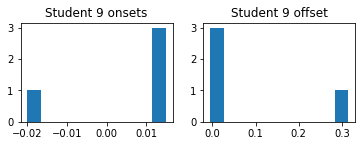

Onset Grade =  79.2 	 Duration Grade =  90.0


Onset ABS  Mean: 0.016250,Onset Mean: 0.006250, Dev. from 0: 0.016394


Offset Mean: 0.077423, Dev. from 0: 0.157522


  TF 1 Mark  =  90.0 Sound Control Grade =  90.0
Final Mark =  3.6
[ 0.015 -0.02   0.015  0.015]
list0[k]
72.0
Student 10 offset


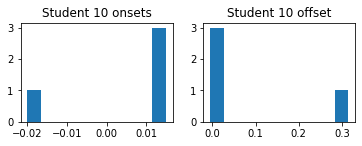

Onset Grade =  72.0 	 Duration Grade =  72.0


Onset ABS  Mean: 0.016250,Onset Mean: 0.006250, Dev. from 0: 0.016394


Offset Mean: 0.077423, Dev. from 0: 0.157522


  TF 1 Mark  =  56.7 Sound Control Grade =  56.7
Final Mark =  1.8


In [98]:
onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [ ]:
df_all

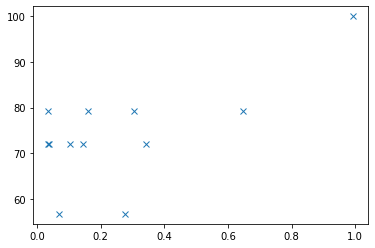

[100.0, 79.2, 56.7, 72.0, 72.0, 79.2, 72.0, 56.7, 72.0, 79.2, 72.0, 79.2]


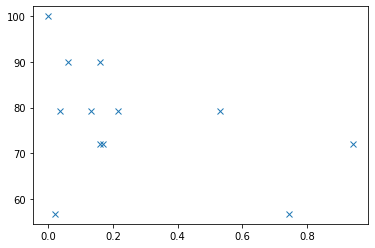

In [123]:
onset_mean_list = df_all["Onset Mean"].tolist()   
onset_amean_list = df_all["Onset ABS Mean"].tolist()   
onset_grade_list = df_all["onsetMark"].tolist()   
onset_precision_list = df_all["precision"].tolist()   

plt.plot(onset_precision_list,onset_grade_list, 'x')
plt.show()

Duration_mean_list = df_all["Duration Mean"].tolist()   
Duration_amean_list = df_all["Duration ABS Mean"].tolist()   
Duration_amean_list = df_all["Duration ABS Mean"].tolist()
Duration_grade_list = df_all[" DurationMark"].tolist()   
print(onset_grade_list)

plt.plot(Duration_amean_list,Duration_grade_list, 'x')
plt.show()


# I should try to plot Precision against  ONSET_GRADE(Y) vs PRECISION (X)
# I should try to plot Precision against  ONSET_GRADE(Y) vs ABSOLUTE MEAN (X)
# TRY TO EXPLAIN
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= 
#statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [100]:
import pandas as pd
#sonset_deviations,soffset_deviations

In [101]:
data_timing_onset0= { 'onsets0' :sonset_deviations[0]}
df = pd.DataFrame(data_timing_onset0,columns=['onsets0'])
fig = px.histogram(df, x="onsets0")
fig.show()

In [102]:

data_timing_duration0= { 'durations0' :soffset_deviations[0]}
df = pd.DataFrame(data_timing_duration0,columns=['durations0'])
fig = px.histogram(df, x="durations0")
fig.show()

In [103]:
dataset = pd.read_csv('drive/MyDrive/Bass/data/wotm/StudentStatistics_wotm.csv') 
#dataset = pd.read_csv('drive/MyDrive/Bass/data/StudentStatisticsBillie.csv')
header = ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             "Sound Quality Mark",  " finalMark"]

In [104]:
dataset

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,Sound Quality Mark,finalMark
0,0,0.992,1.000,0.996,0.000,0.000,0.000,0.000,0.000,0.000,100.0,100.0,100.0,100.0,5.0
1,1,0.306,0.314,0.310,0.010,-0.003,0.012,0.061,-0.047,0.206,79.2,90.0,79.2,72.0,3.6
2,2,0.277,0.280,0.278,0.011,-0.004,0.013,0.021,-0.010,0.027,56.7,56.7,72.0,72.0,1.8
3,3,0.144,0.161,0.152,0.014,-0.001,0.015,0.132,0.097,0.382,72.0,79.2,79.2,79.2,2.7
4,4,0.102,0.110,0.106,0.010,-0.001,0.012,0.215,0.120,0.246,72.0,79.2,79.2,72.0,2.7
5,5,0.648,0.907,0.756,0.002,0.001,0.004,0.530,-0.527,0.997,79.2,79.2,79.2,79.2,3.6
6,6,0.342,0.347,0.345,0.010,-0.000,0.011,0.168,-0.138,0.480,72.0,72.0,72.0,79.2,2.7
7,7,0.069,0.085,0.076,0.011,-0.008,0.013,0.744,-0.687,1.287,56.7,56.7,72.0,79.2,2.7
8,8,0.037,0.034,0.036,0.011,-0.006,0.013,0.942,-0.942,1.295,72.0,72.0,72.0,79.2,2.7
9,9,0.035,0.034,0.034,0.016,0.006,0.016,0.160,0.155,0.223,79.2,90.0,90.0,90.0,3.6


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#X = dataset[['P', 'R', 'F',  ' ABS Mean Onset','Mean  Onset','Std Onset',' ABS Mean Duration','Mean Duration','Std Duration']]
#X = dataset[['precision', 'recall', 'f_measure_value',  'Onset ABS Mean','Onset Mean','Onset Std']]
#X = dataset[['precision','recall','f_measure_value']]#,'Onset Mean','Onset Std']]
X = dataset[['precision','recall','f_measure_value']]#,]]
y=array(dataset['onsetMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# IEC PRF Mean Absolute Error: 12.079847760757067
# IEC PRF Root Mean Squared Error: 12.521853181718802

      Actual  Predicted
0  72.000000  77.002899
1  79.199997  69.732650
2  72.000000  69.079026
3  72.000000  65.686438
Mean Absolute Error: 5.926195413506598
Root Mean Squared Error: 6.384606697281865


In [ ]:
dataset

In [127]:
X = dataset[['precision','recall','f_measure_value','Duration ABS Mean']]
#X = dataset[['precision','recall','f_measure_value']]
y=array(dataset[' DurationMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


      Actual  Predicted
0  72.000000  83.015091
1  79.199997  76.096494
2  79.199997  77.093964
3  72.000000  72.442016
Mean Absolute Error: 4.1666606403590905
Root Mean Squared Error: 5.822257208599753


In [ ]:
dataset

In [121]:
X = dataset[['precision','recall','f_measure_value']]
y=array(dataset[' TF 1 Mark '])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) ,'Duration Std',,'Duration Std'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

      Actual  Predicted
0  72.000000  80.018391
1  72.000000  82.625873
2  79.199997  74.860405
3  56.700001  78.773665
Mean Absolute Error: 11.264380067797632
Root Mean Squared Error: 13.069836182020637
